More info on problem 1 (v) : https://fabiandablander.com/statistics/Two-Properties.html (Property I: Closed under Marginalization)

More info on Problem 2 : 

https://www.youtube.com/watch?v=i7OY7CZUdIY 

https://python.plainenglish.io/using-python-to-simulate-the-famous-monty-hall-problem-b4a9697894ba

# P02: Probability

# Group 10 Solutions

## Problem 1: The Gaussian distribution

Let us assume, we measure two quantities $y_1, y_2$ at locations $x_1, x_2$. We know that our observations are independent and each follows a Gaussian distribution with means $\mu_1, \mu_2$ and standard deviations $\sigma_1, \sigma_2$, i.e. $$P(y_1)=\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}},$$ and $$P(y_2)=\frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}.$$ We have that $\mu_1=0, \mu_2=2, \sigma_1=0.5, \sigma_2=2$, and the setup is illustrated in the plot below.

(i) What is the joint distribution $P(y_1, y_2)$ of $y_1, y_2$? Write down its analytical form.

(ii) Use `numpy` to draw $n$ samples of $y^i_1, y^i_2$ from this distribution. You can start with $n=100$ and see what happens if you increase $n$.

(iii) Use `matplotlib` to plot histograms of the samples. In particular, plot both the 2D histogram for $y_1, y_2$, as well as the two 1D histograms for $y_1$ and $y_2$.

(iv) Use `matplotlib` to obtain a contour plot from the 2D samples. Overplot it on your 2D historgram and compare.

(v) Derive an analytic expectation for the 1D histograms of $y_1$ and $y_2$ (what distribution are you plotting in this case?). Compare to your findings above. 

(vi) Let us now assume that we are actually not interested in $y_1, y_2$ but in a linear transformation of these variables, $z_1, z_2$ defined as $$\boldsymbol{z}=A\boldsymbol{y},$$ where $$A=\begin{pmatrix}
1 & 0.2  \\
0.2 & 1 
\end{pmatrix}.$$ Using these new samples, repeat problems 1.1 to 1.5. What has changed compared to before? 

**Hint:** For (v) you can use the analytic expression for the 2D Gaussian we have discussed in class, i.e. $$\mathcal{N}(\boldsymbol{y}) = \frac{1}{\sqrt{(2\pi)^n|C|}}e^{-\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{y}-\boldsymbol{\mu})},$$ with $$C = \begin{pmatrix}
\sigma^2_1 & r\sigma_1\sigma_2  \\
r\sigma_1\sigma_2 & \sigma^2_2 
\end{pmatrix}.$$

# (i)

Joint probability distribution is given by the product of the two individual probability distributions:
$$P(y_1)*P(y_2) =\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}}*\frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}$$
$$P(y_1,y_2) =\frac{1}{2\pi\sigma_1\sigma_2}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.gridspec import GridSpec
from matplotlib import colors

# (ii), (iii), (iv)

In [2]:
y1,y2 = np.random.normal(0,0.5,100000), np.random.normal(2,2,100000)

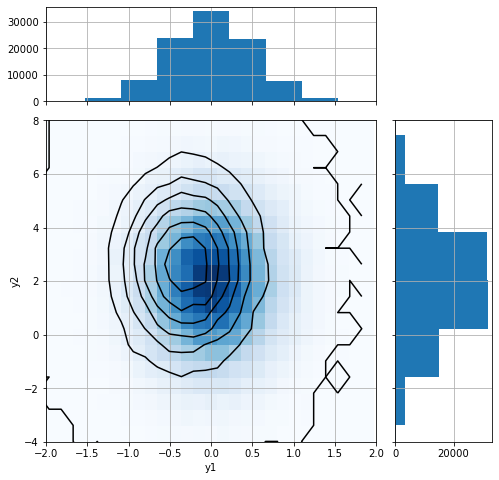

In [3]:
fig1 = plt.figure(figsize=(8,8))
gs = GridSpec(4,4)

ax1 = fig1.add_subplot(gs[1:4,0:3])
ax_x = fig1.add_subplot(gs[0,0:3])
ax_y = fig1.add_subplot(gs[1:4,3])


hist = ax1.hist2d(y1,y2, bins=30, cmap='Blues')
ax1.set_xlabel('y1')
ax1.set_ylabel('y2')
ax1.set_xlim(-2,2)
ax1.set_ylim(-4,8)
ax1.contour(hist[1][:-1], hist[2][:-1], hist[0], colors='black')

ax_x.hist(y1)
ax_x.set_xlim(ax1.get_xlim())

ax_y.hist(y2, orientation="horizontal")
ax_y.set_ylim(ax1.get_ylim())

plt.setp(ax_x.get_xticklabels(), visible=False)
plt.setp(ax_y.get_yticklabels(), visible=False)

ax1.grid(True)
ax_x.grid(True)
ax_y.grid(True)

# (v)

To get the 1D histograms of $y_1$ and $y_2$, we need to integrate the joint probability distribution over the other variable. 

The analytic expression for the 2D Gaussian is given by:
$$\mathcal{N}(\boldsymbol{y}) = \frac{1}{\sqrt{(2\pi)^n|C|}}e^{-\frac{1}{2}(\boldsymbol{y}-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{y}-\boldsymbol{\mu})},$$
where $C$ is the covariance matrix:
$$C = \begin{pmatrix}
\sigma^2_1 & r\sigma_1\sigma_2  \\
r\sigma_1\sigma_2 & \sigma^2_2
\end{pmatrix}.$$
For the given question, $\boldsymbol{y} = (y_1, y_2)$, $\boldsymbol{\mu} = (\mu_1, \mu_2)$. Since the distributions are independent, they are uncorrelated and $\ r = 0$ and thus $C$ is given by:
$$C = 
\begin{pmatrix}
\sigma^2_1 & 0  \\
0 & \sigma^2_2
\end{pmatrix}$$
Determinant of $C$ is given by:
$$|C| = \sigma^2_1\sigma^2_2$$
Inverse of $C$ is given by:
$$C^{-1} = \frac{1}{\sigma^2_1\sigma^2_2}
\begin{pmatrix}
\sigma^2_2 & 0  \\
0 & \sigma^2_1
\end{pmatrix}$$

$\begin{align}
(\boldsymbol{y}-\boldsymbol{\mu})^TC^{-1}(\boldsymbol{y}-\boldsymbol{\mu}) & = \frac{1}{\sigma^2_1\sigma^2_2}
\begin{pmatrix}
y_1-\mu_1 & y_2-\mu_2 
\end{pmatrix}
\begin{pmatrix}
\sigma^2_2 & 0  \\
0 & \sigma^2_1
\end{pmatrix}
\begin{pmatrix}
y_1-\mu_1 \\ 
y_2-\mu_2 
\end{pmatrix} \\
& =\frac{1}{\sigma^2_1\sigma^2_2}
\begin{pmatrix}
\sigma^2_2(y_1-\mu_1) & \sigma^2_1(y_2-\mu_2)
\end{pmatrix}
\begin{pmatrix}
y_1-\mu_1 \\ 
y_2-\mu_2 
\end{pmatrix}\\
& = \frac{1}{\sigma^2_1\sigma^2_2}
(\sigma^2_2(y_1-\mu_1)^2 + \sigma^2_1(y_2-\mu_2)^2)\\
& = \frac{(y_1-\mu_1)^2}{\sigma^2_1} + \frac{(y_2-\mu_2)^2}{\sigma^2_2}
\end{align}$

Thus the analytic expression for the 2D Gaussian is given by:

$$P(y_1,y_2) = \frac{1}{2\pi\sigma_1\sigma_2}e^{-\frac{(y_1-\mu_1)^2}{2\sigma^2_1} - \frac{(y_2-\mu_2)^2}{2\sigma^2_2}}$$
This is exactlt the same as the joint probability distribution we derived in part (i).

To get the histogram of $y_1$, we need to integrate over $y_2$:
$$P(y_1) = \int_{-\infty}^{\infty}P(y_1,y_2)dy_2$$
$$P(y_1) = \int_{-\infty}^{\infty}\frac{1}{2\pi\sigma_1\sigma_2}e^{-\frac{(y_1-\mu_1)^2}{2\sigma^2_1} - \frac{(y_2-\mu_2)^2}{2\sigma^2_2}}dy_2 = \frac{1}{2\pi\sigma_1\sigma_2}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}} \int_{-\infty}^{\infty}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}dy_2$$
$$P(y_1) = \frac{1}{2\pi\sigma_1\sigma_2}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}} \sqrt{2\pi}\sigma_2 = \frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(y_1-\mu_1)^2}{2\sigma_1^2}}$$


Similarly, to get the histogram of $y_2$, we need to integrate over $y_1$:
$$P(y_2) = \int_{-\infty}^{\infty}P(y_1,y_2)dy_1 = \frac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(y_2-\mu_2)^2}{2\sigma_2^2}}$$

These are exactly the same as the individual probability distributions given in the question.
This can also be seen in the plots comparing 1D histrograms and these distribution $P(y_1)$ and $P(y_2)$.

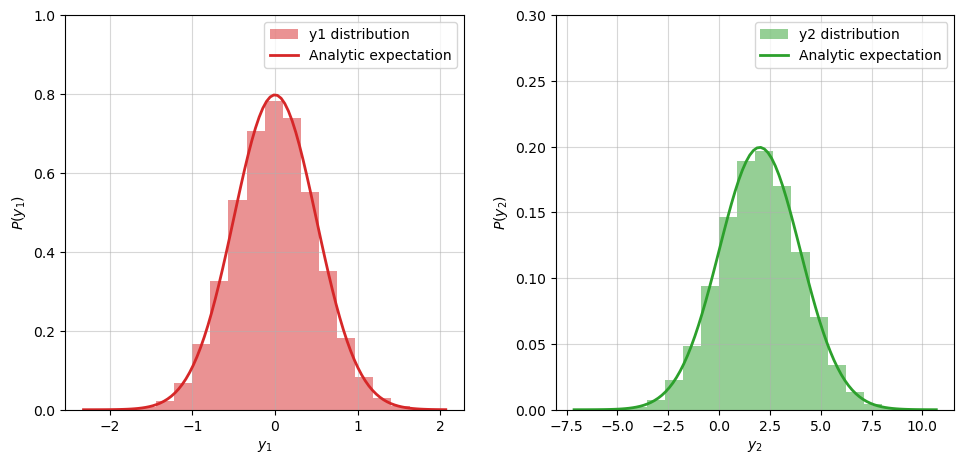

In [43]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

y1_range = np.linspace(y1.min(),y1.max(),100)
P_y1 = np.exp(-(y1_range-0)**2/(2*0.5**2))/(np.sqrt(2*np.pi)*0.5)
ax[0].hist(y1, bins=20, density=True, color='tab:red', alpha=0.5, label='y1 distribution')
ax[0].plot(y1_range, P_y1, color='tab:red', label='Analytic expectation', lw=2)
ax[0].set_xlabel('$y_1$')
ax[0].set_ylabel('$P(y_1)$')
ax[0].legend()
ax[0].set_ylim(0,1)
ax[0].grid(True, alpha=0.5)

y2_range = np.linspace(y2.min(),y2.max(),100)
P_y2 = np.exp(-(y2_range-2)**2/(2*2**2))/(np.sqrt(2*np.pi)*2)
ax[1].hist(y2, bins=20, density=True, color='tab:green', alpha=0.5, label='y2 distribution')
ax[1].plot(y2_range, P_y2, color='tab:green', label='Analytic expectation', lw=2)
ax[1].set_xlabel('$y_2$')
ax[1].set_ylabel('$P(y_2)$')
ax[1].legend()
ax[1].set_ylim(0,0.3)
ax[1].grid(True, alpha=0.5)

fig.tight_layout(pad=2.0)

# (vi)

$$\boldsymbol{z}= \begin{pmatrix} y_1 & y_2 \end{pmatrix}
\begin{pmatrix}
1 & 0.2  \\
0.2 & 1 
\end{pmatrix}
$$ 
$$ \begin{pmatrix} z_1 & z_2 \end{pmatrix} = 
\begin{pmatrix} y_1+0.2y_2 & 0.2y_1+y_2 \end{pmatrix}
$$

Since $z_1$ and $z_2$ are linear combinations of $y_1$ and $y_2$, they are dependent. Thus the covariance matrix $C$ is given by:
$$C = \begin{pmatrix}
\sigma^2_1 & r\sigma_1\sigma_2  \\
r\sigma_1\sigma_2 & \sigma^2_2
\end{pmatrix}$$
where $r$ is the correlation coefficient.
The joint probability distribution is given by:
$$P(z_1,z_2) = \frac{1}{2\pi\sigma_1\sigma_2\sqrt{1-r^2}}e^{-\frac{1}{2(1-r^2)}\left(\frac{(z_1-\mu_1)^2}{\sigma^2_1} + \frac{(z_2-\mu_2)^2}{\sigma^2_2} - \frac{2r(z_1-\mu_1)(z_2-\mu_2)}{\sigma_1\sigma_2}\right)}$$


$r$ is given by $\frac{E[(z_1-\mu_1)(z_2-\mu_2)]}{\sigma_1\sigma_2}$

In [49]:
z1 = y1 + 0.2*y2
z2 = 0.2*y1 + y2
mu1, mu2 = 0, 2
sigma1, sigma2 = 0.5, 2

In [50]:
z1_sample, z2_sample = z1,z2

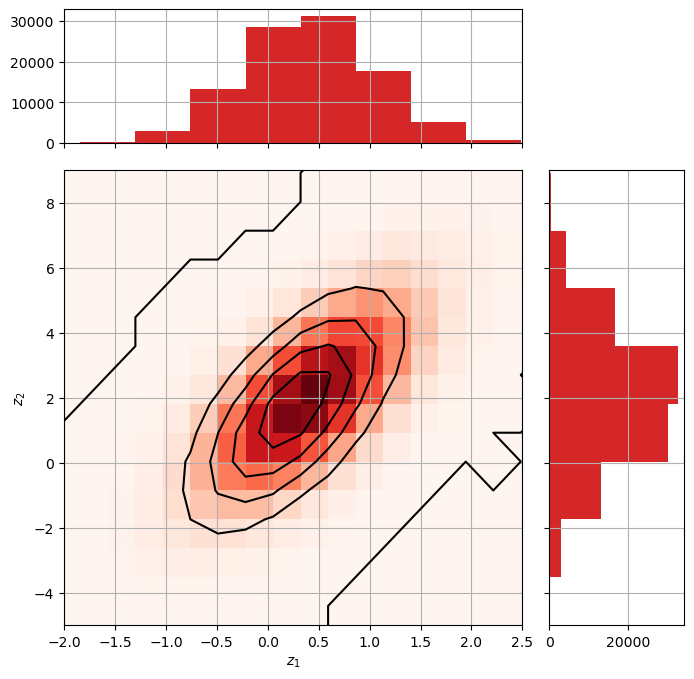

In [47]:
fig1 = plt.figure(figsize=(8,8))
gs = GridSpec(4,4)

ax1 = fig1.add_subplot(gs[1:4,0:3])
ax_x = fig1.add_subplot(gs[0,0:3])
ax_y = fig1.add_subplot(gs[1:4,3])


hist = ax1.hist2d(z1_sample,z2_sample, bins=20, cmap='Reds')
ax1.set_xlabel('$z_1$')
ax1.set_ylabel('$z_2$')
ax1.set_xlim(-2,2.5)
ax1.set_ylim(-5,9)
ax1.contour(hist[1][:-1], hist[2][:-1], hist[0], 5, colors='black')

ax_x.hist(z1_sample, color='tab:red')
ax_x.set_xlim(ax1.get_xlim())

ax_y.hist(z2_sample, color='tab:red', orientation="horizontal")
ax_y.set_ylim(ax1.get_ylim())

plt.setp(ax_x.get_xticklabels(), visible=False)
plt.setp(ax_y.get_yticklabels(), visible=False)

ax1.grid(True)
ax_x.grid(True)
ax_y.grid(True)

Since $z_1$ and $z_2$ are linear combinations of $y_1$ and $y_2$, they are dependent variables and hence will have a non-zero correlation coefficient $r$ as seen in the plot above

The analytical expression for 1D histograms of $z_1$ and $z_2$ are still given by the same expressions as in part (v) as they are still normal distributions. As it is known that linear combination of normal distributions will also follow a normal distribution, their mean and variance can be calculated as follows:

In [45]:
mu_z1 = mu1 + 0.2*mu2
mu_z2 = 0.2*mu1 + mu2

sigma_z1 = np.sqrt((sigma1**2)+(0.2*sigma2)**2)
sigma_z2 = np.sqrt((0.2*sigma1)**2+(sigma2**2))

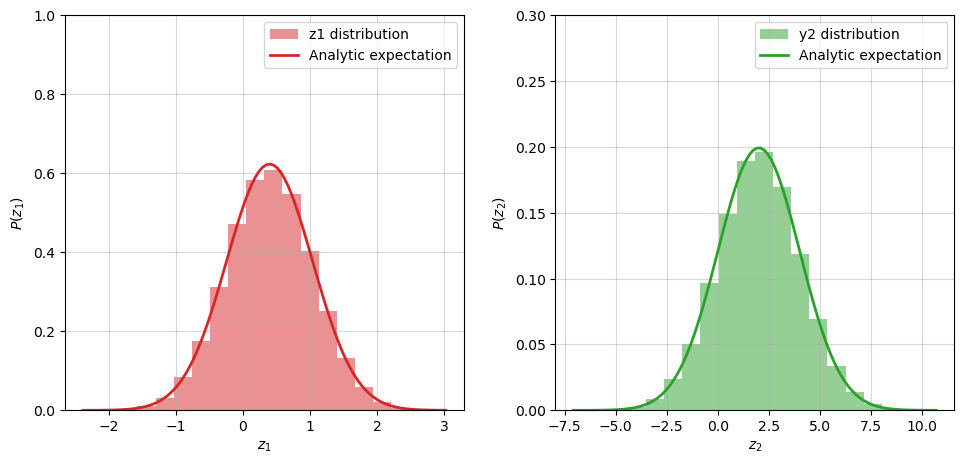

In [48]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

z1_range = np.linspace(z1.min(),z1.max(),100)
P_z1 = np.exp(-(z1_range-mu_z1)**2/(2*sigma_z1**2))/(np.sqrt(2*np.pi)*sigma_z1)
ax[0].hist(z1, bins=20, density=True, color='tab:red', alpha=0.5, label='z1 distribution')
ax[0].plot(z1_range, P_z1, color='tab:red', label='Analytic expectation', lw=2)
ax[0].set_xlabel('$z_1$')
ax[0].set_ylabel('$P(z_1)$')
ax[0].legend()
ax[0].set_ylim(0,1)
ax[0].grid(True, alpha=0.5)

z2_range = np.linspace(z2.min(),z2.max(),100)
P_z2 = np.exp(-(z2_range-mu_z2)**2/(2*sigma_z2**2))/(np.sqrt(2*np.pi)*sigma_z2)
ax[1].hist(z2, bins=20, density=True, color='tab:green', alpha=0.5, label='y2 distribution')
ax[1].plot(z2_range, P_z2, color='tab:green', label='Analytic expectation', lw=2)
ax[1].set_xlabel('$z_2$')
ax[1].set_ylabel('$P(z_2)$')
ax[1].legend()
ax[1].set_ylim(0,0.3)
ax[1].grid(True, alpha=0.5)

fig.tight_layout(pad=2.0)

Text(0, 0.5, '$y$')

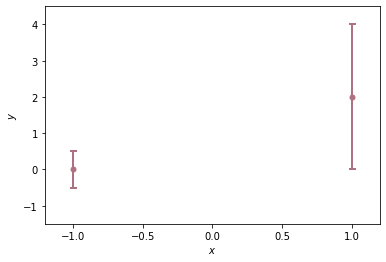

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([-1, 1])
mu = np.array([0, 2])
sigma  = np.array([0.5, 2])

plt.errorbar(x, mu, yerr=sigma, marker='.', linewidth=2, markersize=10, \
            elinewidth=2, capthick=2, capsize=3.5, linestyle='None', color='#AE7182')
plt.xlim(-1.2, 1.2)
plt.ylim(-1.5, 4.5)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

## Problem 2: The Monty Hall problem (taken from MacKay)

On a game show, a contestant is told the rules as follows:

There are three doors, labeled 1, 2, 3. A single prize has been hidden behind one of them. You get to select one door. Initially your chosen door will not be opened. Instead, the gameshow host will open one of the other two doors, and he will do so in such a way as not to reveal the prize. For example, if you first choose door 1, he will then open one of doors 2 and 3, and it is guaranteed that he will choose which one to open so that the prize will not be revealed.

At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you will receive whatever is behind your final choice of door.
Imagine that the contestant chooses door 1 first; then the gameshow host opens door 3, revealing nothing behind the door, as promised. 

Should the contestant 

(i) stick with door 1, 

(ii) switch to door 2, 

(ii) or does it make no difference?

Explain your solution and reasoning.

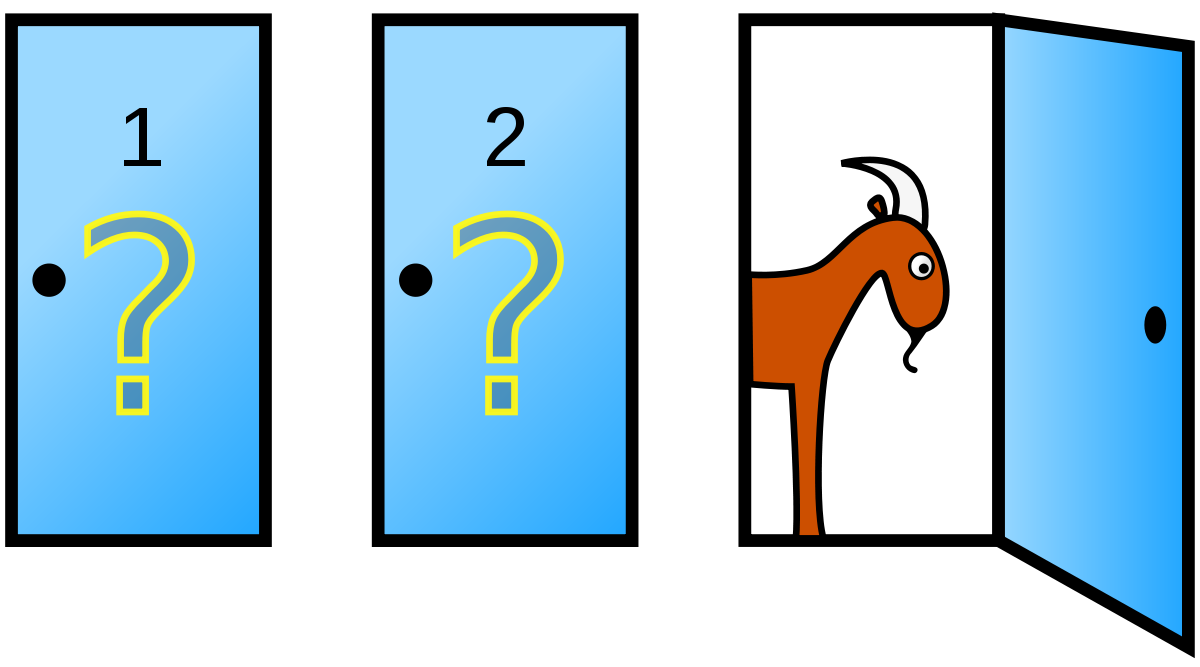

The contestant should switch to door 2. This is because initially the probability of the prize being behind door 1 is 1/3, door 2 is 1/3 and door 3 is 1/3. If door 1 is chosen, probability of the prize being behind door 1 is 1/3 and probability of the prize being behind door 2 and door 3 is 2/3.
Since the host opens door 3, the probability of the prize being behind door 3 is 0. Thus the probability of the prize being behind door 2 becomes 2/3 while for door 1 the probability still remains 1/3. Thus the contestant should switch to door 2.

In [65]:
#let's make a simulation of the monty hall problem

#here we have fixed a door where we have the prize
prize_door = np.random.randint(1,4,1)

In [66]:
#this is where the player will choose from the the three doors
choice = input("Choose a door (1, 2, or 3): ")
choice = int(choice)
print("You chose door number %d" % choice)

You chose door number 2


In [67]:
#This is where we open the door which is neither the prize door nor the choice door

#if the chosen door is the prize door we can open any of the two remaining doors 
if choice == prize_door:  #if the chosen door is the prize door we can open any of the two remaining doors 
    open_door = np.random.randint(1,4,1)
    while open_door == choice:
        open_door = np.random.randint(1,4,1)

#if the chosen door is not the prize door, then we only have one door left that we can open
else:  
    open_door = 6 - choice - prize_door #the sum of the numbers of three doors is 6, this will give us the remaining door number

print("We open door number %d" % open_door)

We open door number 3


In [68]:
#now we need to ask the player if they want to switch doors
switch = input("Would you like to switch doors? (y/n): ")
switch = str(switch)

In [69]:
#if the player chooses to switch the door, the choice door is now the other unopened door
if switch == "y":
    choice = 6 - choice - open_door
    print("You switched to door number %d" % choice)

#in this case the choice door is unchanged    
else: 
    choice = choice
    print("You chose to stay with your original door number %d" % choice)

You switched to door number 1


In [70]:
#this step determines if your choice is the prize door or not

if choice == prize_door:
    print("Congratulations! You win!")
else:
    print("Sorry, you lose. Better luck next time!")

Sorry, you lose. Better luck next time!


In [72]:
#now we will simulate the game "n" times to see how much is the probability of winning by switching the door and staying with the original door


n=10000 #number of simulations
win_switch = 0  #initial win count by switching
win_stay = 0    #initial win count by staying
loses = 0       #initial lose count
for i in range(n):
    prize_door = np.random.randint(1, 4, 1) #both the prize door and choice door are randomly chosen

    choice = np.random.randint(1, 4, 1)

    if choice == prize_door: 
        open_door = np.random.randint(1, 4, 1)
        while open_door == choice:
            open_door = np.random.randint(1, 4, 1)
    else:
        open_door = 6 - choice - prize_door

    switch = np.random.randint(0, 2, 1)
    if switch == 1:
        choice = 6 - choice - open_door
        if choice == prize_door:
            win_switch += 1
        else: loses += 1

    else:
        choice = choice
        if choice == prize_door:
            win_stay += 1
        else: loses += 1

print("Probablility of winning by switching is:", win_switch/n)
print("Probability of winning by staying is:", win_stay/n)

Probablility of winning by switching is: 0.327
Probability of winning by staying is: 0.1589


In the above simulation we can see that if we increase the value of n, or simply play the game more number of times, the probability of winning by switching is twice as large as the probability of winning by staying at your original choice. Now since the probability of winning by switching is 2/3 as mentioned above and the probability of winning by staying is 1/3 , and we have randomly chosen the strategy for each play to be either switch or stay. Hence the original probabilities here would be multiplied by 1/2 and you will get P(winning/switching) = 0.33 and P(winning/staying) = 0.67. We do see the expected results in our simulations at higher values of n.

In [73]:
loses/10000

0.5141